In [1]:
import pandas as pd
import datetime
import numpy as np
import os
import sys
today = str(datetime.datetime.now().date())
print(today)
%matplotlib inline

2017-10-13


In [8]:
#https://finance.google.com/finance/getprices?q=HM-B&p=10d&f=d,o,h,l,c,v
#http://finance.google.com/finance/getprices?q=OMXS30&x=INDEXNASDAQ&p=2Y&i=86400&f=d,o,h,l,c,v

CURR_PATH = os.path.dirname(os.path.abspath('__file__'))
ROOT =  os.path.join(CURR_PATH)
sys.path.append(os.path.join(ROOT,'modules'))

import stocks as stocks
import style as style
style.set_style()

Style set


In [7]:
# OMXS30 Data

Quotes = ['OMXS30']
exchange = 'INDEXNASDAQ'
period_length = 1
period = 'Y'
interval_min = 60*24
interval_sec = 60*interval_min
df, url_string = stocks.GoogleIntradayQuote(Quotes,interval_sec,period_length,period,exchange)
print(df.head())
from_date = str(df['datetime'].min().date())
to_date = str(df['datetime'].max().date())
days = np.busday_count(from_date,to_date)+1
print('ticks:',df.shape[0])
print('from:', from_date)
print('to:', to_date)
print('days:', days)

http://finance.google.com/finance/getprices?q=OMXS30&x=INDEXNASDAQ&p=1Y&i=86400&f=d,o,h,l,c,v
             datetime   stock         open         high          low  \
0 2016-10-12 22:00:00  OMXS30  1454.558753  1459.695789  1442.497749   
1 2016-10-13 22:00:00  OMXS30  1442.497749  1442.497749  1422.090277   
2 2016-10-14 22:00:00  OMXS30  1430.308676  1447.579895  1430.016594   
3 2016-10-17 22:00:00  OMXS30  1445.578721  1447.236183  1436.663836   
4 2016-10-18 22:00:00  OMXS30  1441.429827  1459.941837  1441.429827   

         close  volume  
0  1442.497749     0.0  
1  1426.692806     0.0  
2  1446.001627     0.0  
3  1438.280672     0.0  
4  1458.628431     0.0  
ticks: 246
from: 2016-10-12
to: 2017-10-11
days: 261


In [9]:
filename = 'quote='
for Quote in Quotes:
    filename = filename+Quote
filename = filename+'&start='+from_date+'&end='+to_date+'&interval='+str(interval_min)+'min'
print(filename)
df.to_pickle(os.path.join('data',filename+'.pkl'))

quote=OMXS30&start=2011-10-10&end=2017-10-09&interval=1440min


In [11]:
# Stock Data

Quotes = ['FING-B','ALIV-SDB','NCC-B','LUMI-SDB','NET-B','THULE','HM-B',]
period_length = 1
period = 'Y'
interval_min = 60*24
interval_sec = 60*interval_min
df, url_string = stocks.GoogleIntradayQuote(Quotes,interval_sec,period_length,period)
print(df.info())
from_date = str(df['datetime'].min().date())
to_date = str(df['datetime'].max().date())
days = np.busday_count(from_date,to_date)+1
print('ticks:',df.shape[0])
print('from:', from_date)
print('to:', to_date)
print('days:', days)

http://finance.google.com/finance/getprices?q=FING-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=ALIV-SDB&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=NCC-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=LUMI-SDB&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=NET-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=THULE&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=HM-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 7 columns):
datetime    1541 non-null datetime64[ns]
stock       1541 non-null object
open        1541 non-null float64
high        1541 non-null float64
low         1541 non-null float64
close       1541 non-null float64
volume      1541 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)


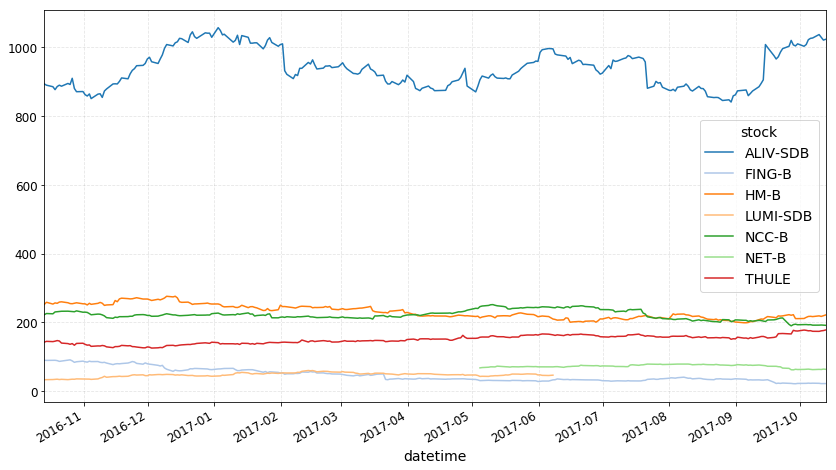

In [10]:
df[['datetime','stock','close']].groupby(['datetime','stock'])['close'].sum().unstack().plot(grid = True)

In [4]:
filename = 'quote='
for Quote in Quotes:
    filename = filename+Quote
filename = filename+'&start='+from_date+'&end='+to_date+'&interval='+str(interval_min)+'min'
print(filename)
df.to_pickle(os.path.join('data',filename+'.pkl'))

quote=FING-BALIV-SDBNCC-BLUMI-SDBNET-BTHULEHM-B&start=2016-10-10&end=2017-10-06&interval=1440min
